In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Stochastic Gradient Descent
class SGDClassifier:
    def __init__(self, loss="log", lr=0.001, max_iter=10000, tol=1e-10, lam=1e-3, verbose=0):
        self.loss = loss
        self.lr = lr
        self.max_iter = max_iter
        self.verbose = verbose
        self.w = None
        self.bias = 0
        self.losses_ = []
        self.tol = tol
        self.lam = lam

    def _compute_loss(self, X, y):
        pred = X @ self.w + self.bias
        if self.loss == "squared":
            return np.mean((y - pred) ** 2) + 0.5 * self.lam * np.sum(self.w**2)
        elif self.loss == "log":
            z = pred * (2*y - 1)
            return np.mean(np.log(1 + np.exp(-z))) + 0.5 * self.lam * np.sum(self.w**2)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.random.randn(n_features) * 0.01
        self.bias = 0

        for it in range(1, self.max_iter + 1):
            i = np.random.randint(0, n_samples)
            xi, yi = X[i], y[i]
            pred = xi @ self.w + self.bias

            if self.loss == "squared":
                err = yi - pred
                grad_w = -2 * err * xi + self.lam * self.w
                grad_b = -2 * err

            elif self.loss == "log":
                p = 1 / (1 + np.exp(-pred))
                diff = p - yi
                grad_w = diff * xi + self.lam * self.w
                grad_b = diff

            eta = self.lr * (1 / it)
            self.w -= eta * grad_w 
            self.bias -= eta * grad_b

            if it % 10 == 0:
                l = self._compute_loss(X, y)
                self.losses_.append(l)
                if len(self.losses_) > 1 and abs(self.losses_[-1] - self.losses_[-2]) < self.tol:
                    break

        return self

    def predict_proba(self, X):
        pred = X @ self.w + self.bias
    
        if self.loss == "log":
            p = 1 / (1 + np.exp(-pred))
        else:
            # squared loss: regression estimate of E[Y|X]
            p = np.clip(pred, 0.0, 1.0)
    
        return np.stack([1 - p, p], axis=1)


    def predict(self, X):
        pred = X @ self.w + self.bias
    
        if self.loss == "log":
            return (pred >= 0).astype(int)     # equivalent to p >= 0.5
        else:
            return (pred >= 0.5).astype(int)

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = (bank_marketing.data.targets == "yes").astype(int)  # convert yes/no -> 1/0

# One-hot encode categorical features
X = pd.get_dummies(X)

# Scale numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.2, random_state=42
)


In [3]:
classifier = SGDClassifier(loss="squared", lr=1e-1, verbose=0, lam=1e-4, tol=1e-8)
classifier.fit(X_train, y_train)

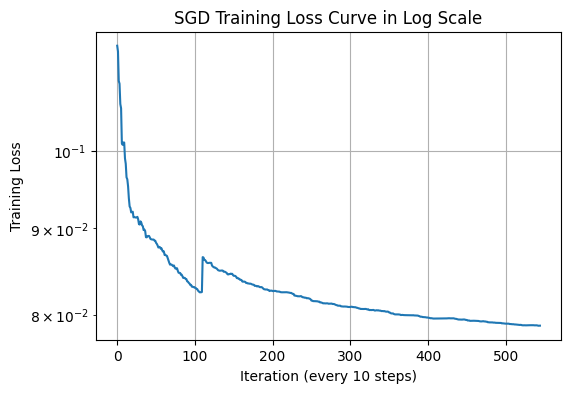

In [4]:
plt.figure(figsize=(6,4))
plt.plot(classifier.losses_)
plt.xlabel("Iteration (every 10 steps)")
plt.ylabel("Training Loss")
plt.title("SGD Training Loss Curve in Log Scale")
plt.yscale('log')
plt.grid(True)
plt.show()

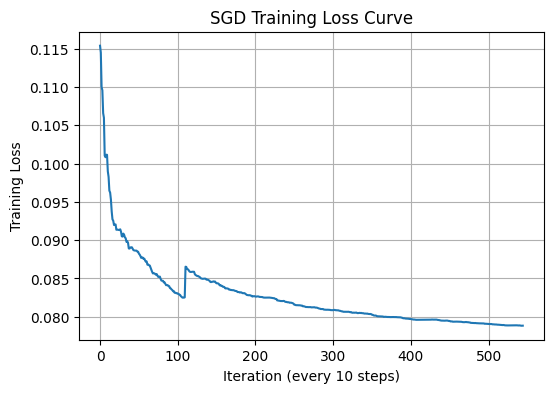

In [5]:
plt.figure(figsize=(6,4))
plt.plot(classifier.losses_)
plt.xlabel("Iteration (every 10 steps)")
plt.ylabel("Training Loss")
plt.title("SGD Training Loss Curve")
#plt.yscale('log')
plt.grid(True)
plt.show()

In [6]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.885104500718788


In [7]:
#classifier.losses_

In [8]:
test_loss = classifier._compute_loss(X_test, y_test)
print("Test Loss:", test_loss)

Test Loss: 0.08081644691269908
